## Group Project Prososal (Group 11) 

## 1. Title : Credit Card Fraud Data Analysis Report


## 2. Introduction

**1) Background Information** 

As digital payments boomed in recent years with the rapid development of the Internet, people enjoy the fast and convenient transaction service but also face an increasing number of cyber criminals alongside. The Data Breach Index announced that over five million records are being stolen on a daily basis, which indicates that fraud is very common in our daily life. However, detection of fraud is challenging since trillions of card transactions happen per day. 


**2) Research Question**

Using our classification model, can we predict fraudulent transaction using **<font color=red> distance from home and ratio to median purchase price</font>** variables to prevent future crime?

**3) Dataset description**

We will be using a dataset called Credit Card Fraud by Dhanush Narayanan from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud. The dataset is in a “Comma Seperated Value” (csv) file format and contains eight columns, which are: 
- **distance_from_home** = the distance from home where the transaction happened
- **distance_from_last_transaction** = the distance from last transaction happened.
- **ratio_to_median_purchase_price**  =  Ratio of purchased price transaction to median purchase price.
- **repeat_retailer** = whether the transaction happened from same retailer or not
- **used_chip** = whether the transaction is through chip (credit card) or not
- **used_pin_number** = whether the transaction happened by using PIN number or not
- **online_order** = whether the transaction is an online order or not
- **fraud** = whether the transaction is fraudulent or not

Our target variable, which is the variable that we are predicting, is fraud and the predictors that we will be using are distance_from_home and ratio_to_median_purchase_price.

## 3. Preliminary exploratory data analysis

First of all, we would load the packages that are required to perform the analysis of our dataset.

In [25]:
#Load packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)

After loading the required packages, we will read our dataset into R using read_csv and assigned it to an object called `original_data`.

In [26]:
#Read the dataset into R
original_data <- read_csv("data/card_transdata.csv")

#Show the first ten rows of the dataset
head(original_data, 10)

Parsed with column specification:
cols(
  distance_from_home = col_double(),
  distance_from_last_transaction = col_double(),
  ratio_to_median_purchase_price = col_double(),
  repeat_retailer = col_double(),
  used_chip = col_double(),
  used_pin_number = col_double(),
  online_order = col_double(),
  fraud = col_double()
)



distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57.8778566,0.3111400,1.94593998,1,1,0,0,0
10.8299427,0.1755915,1.29421881,1,0,0,0,0
5.0910795,0.8051526,0.42771456,1,0,0,1,0
2.2475643,5.6000435,0.36266258,1,1,0,1,0
44.1909360,0.5664863,2.22276730,1,1,0,1,0
5.5864077,13.2610733,0.06476847,1,0,0,0,0
3.7240191,0.9568379,0.27846494,1,0,0,1,0
4.8482466,0.3207354,1.27304952,1,0,1,0,0
0.8766323,2.5036089,1.51699932,0,0,0,0,0


Now, we will use the `cor()` function to find the correlation of each variable in the dataset with our target variable (`fraud`). The closer the correlation value of a variable is to 1, the stronger the correlation of the variable to our target variable and so, we would choose that variable as our predictors.

In [27]:
#Finding the correlation between fraud and other variables
cor(original_data)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.0000000000,0.0001928283,-0.0013741792,0.1431242563,-0.0006970671,-0.0016221862,-0.0013011283,0.18757078
distance_from_last_transaction,0.0001928283,1.0000000000,0.0010125256,-0.0009282325,0.0020548558,-0.0008986436,0.0001408932,0.09191691
ratio_to_median_purchase_price,-0.0013741792,0.0010125256,1.0000000000,0.0013738219,0.0005865787,0.0009422046,-0.0003298145,0.46230472
repeat_retailer,0.1431242563,-0.0009282325,0.0013738219,1.0000000000,-0.0013447766,-0.0004173906,-0.0005322431,-0.00135745
used_chip,-0.0006970671,0.0020548558,0.0005865787,-0.0013447766,1.0000000000,-0.0013931882,-0.0002187927,-0.06097460
used_pin_number,-0.0016221862,-0.0008986436,0.0009422046,-0.0004173906,-0.0013931882,1.0000000000,-0.0002909938,-0.10029254
online_order,-0.0013011283,0.0001408932,-0.0003298145,-0.0005322431,-0.0002187927,-0.0002909938,1.0000000000,0.19197252
fraud,0.1875707828,0.0919169123,0.4623047223,-0.0013574501,-0.0609745976,-0.1002925373,0.1919725224,1.00000000


The next step is to clean our dataset into a tidy format. However, columns `repeat_retailer`, `used_chip`, `used_pin_number`, `online_order`, and `fraud` contain binary values `0` and `1` so we change these values into a logical statement and then as a factor.

In [28]:
data <- original_data %>%
        #Converts columns from numerical to logical
            mutate(repeat_retailer = as.logical(repeat_retailer)) %>%
            mutate(used_chip = as.logical(used_chip)) %>%
            mutate(used_pin_number = as.logical(used_pin_number)) %>%
            mutate(online_order = as.logical(online_order)) %>%
            mutate(fraud = as.logical(fraud))%>%
        #Converts data types into factor
            mutate(repeat_retailer = as_factor(repeat_retailer)) %>%
            mutate(used_chip = as_factor(used_chip)) %>%
            mutate(used_pin_number = as_factor(used_pin_number)) %>%
            mutate(fraud = as_factor(fraud)) 

#Show the first ten rows of the dataset
head(data, 10)

distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<lgl>,<fct>
57.8778566,0.3111400,1.94593998,TRUE,TRUE,FALSE,FALSE,FALSE
10.8299427,0.1755915,1.29421881,TRUE,FALSE,FALSE,FALSE,FALSE
5.0910795,0.8051526,0.42771456,TRUE,FALSE,FALSE,TRUE,FALSE
2.2475643,5.6000435,0.36266258,TRUE,TRUE,FALSE,TRUE,FALSE
44.1909360,0.5664863,2.22276730,TRUE,TRUE,FALSE,TRUE,FALSE
5.5864077,13.2610733,0.06476847,TRUE,FALSE,FALSE,FALSE,FALSE
3.7240191,0.9568379,0.27846494,TRUE,FALSE,FALSE,TRUE,FALSE
4.8482466,0.3207354,1.27304952,TRUE,FALSE,TRUE,FALSE,FALSE
0.8766323,2.5036089,1.51699932,FALSE,FALSE,FALSE,FALSE,FALSE


We will only be selecting for the columns that will function as our target variable (`fraud`) and predictors (`distance_from_home` and `ratio_to_median_purchase_price`) in our classification model. We will assign our tidy dataset into an object called `card_data`.

In [29]:
#Selecting for the columns that will become the target variable and predictors
card_data <- select(data, distance_from_home, ratio_to_median_purchase_price, fraud )

#Show the first ten rows of the tidy dataset
head(card_data, 10)

distance_from_home,ratio_to_median_purchase_price,fraud
<dbl>,<dbl>,<fct>
57.8778566,1.94593998,FALSE
10.8299427,1.29421881,FALSE
5.0910795,0.42771456,FALSE
2.2475643,0.36266258,FALSE
44.1909360,2.22276730,FALSE
5.5864077,0.06476847,FALSE
3.7240191,0.27846494,FALSE
4.8482466,1.27304952,FALSE
0.8766323,1.51699932,FALSE


Next, we will be splitting our dataset (`card_data`) where 75% of the dataset will be our training dataset (`card_train`) and the other 25% will be our testing dataset (`card_test`).

In [30]:
#Setting the seed
set.seed(1)

#Splitting the dataset stored in card_data into training dataset and testing dataset
card_split <- initial_split(card_data, prop = 0.75, strata = fraud)  
card_train <- training(card_split) 
card_test <- testing(card_split)

#Show the first ten rows of the training dataset
head(card_train, 10)

distance_from_home,ratio_to_median_purchase_price,fraud
<dbl>,<dbl>,<fct>
5.091079,0.42771456,FALSE
2.247564,0.36266258,FALSE
5.586408,0.06476847,FALSE
4.848247,1.27304952,FALSE
8.839047,2.36168255,FALSE
13.592368,1.37032986,FALSE
765.282559,0.55124475,FALSE
13.955972,2.79890112,FALSE
179.665148,0.53564048,FALSE


Lastly, we will create a scatter plot to visualize the relationship between our target variable and predictors.

Warning message:
“Removed 25 rows containing missing values (geom_point).”


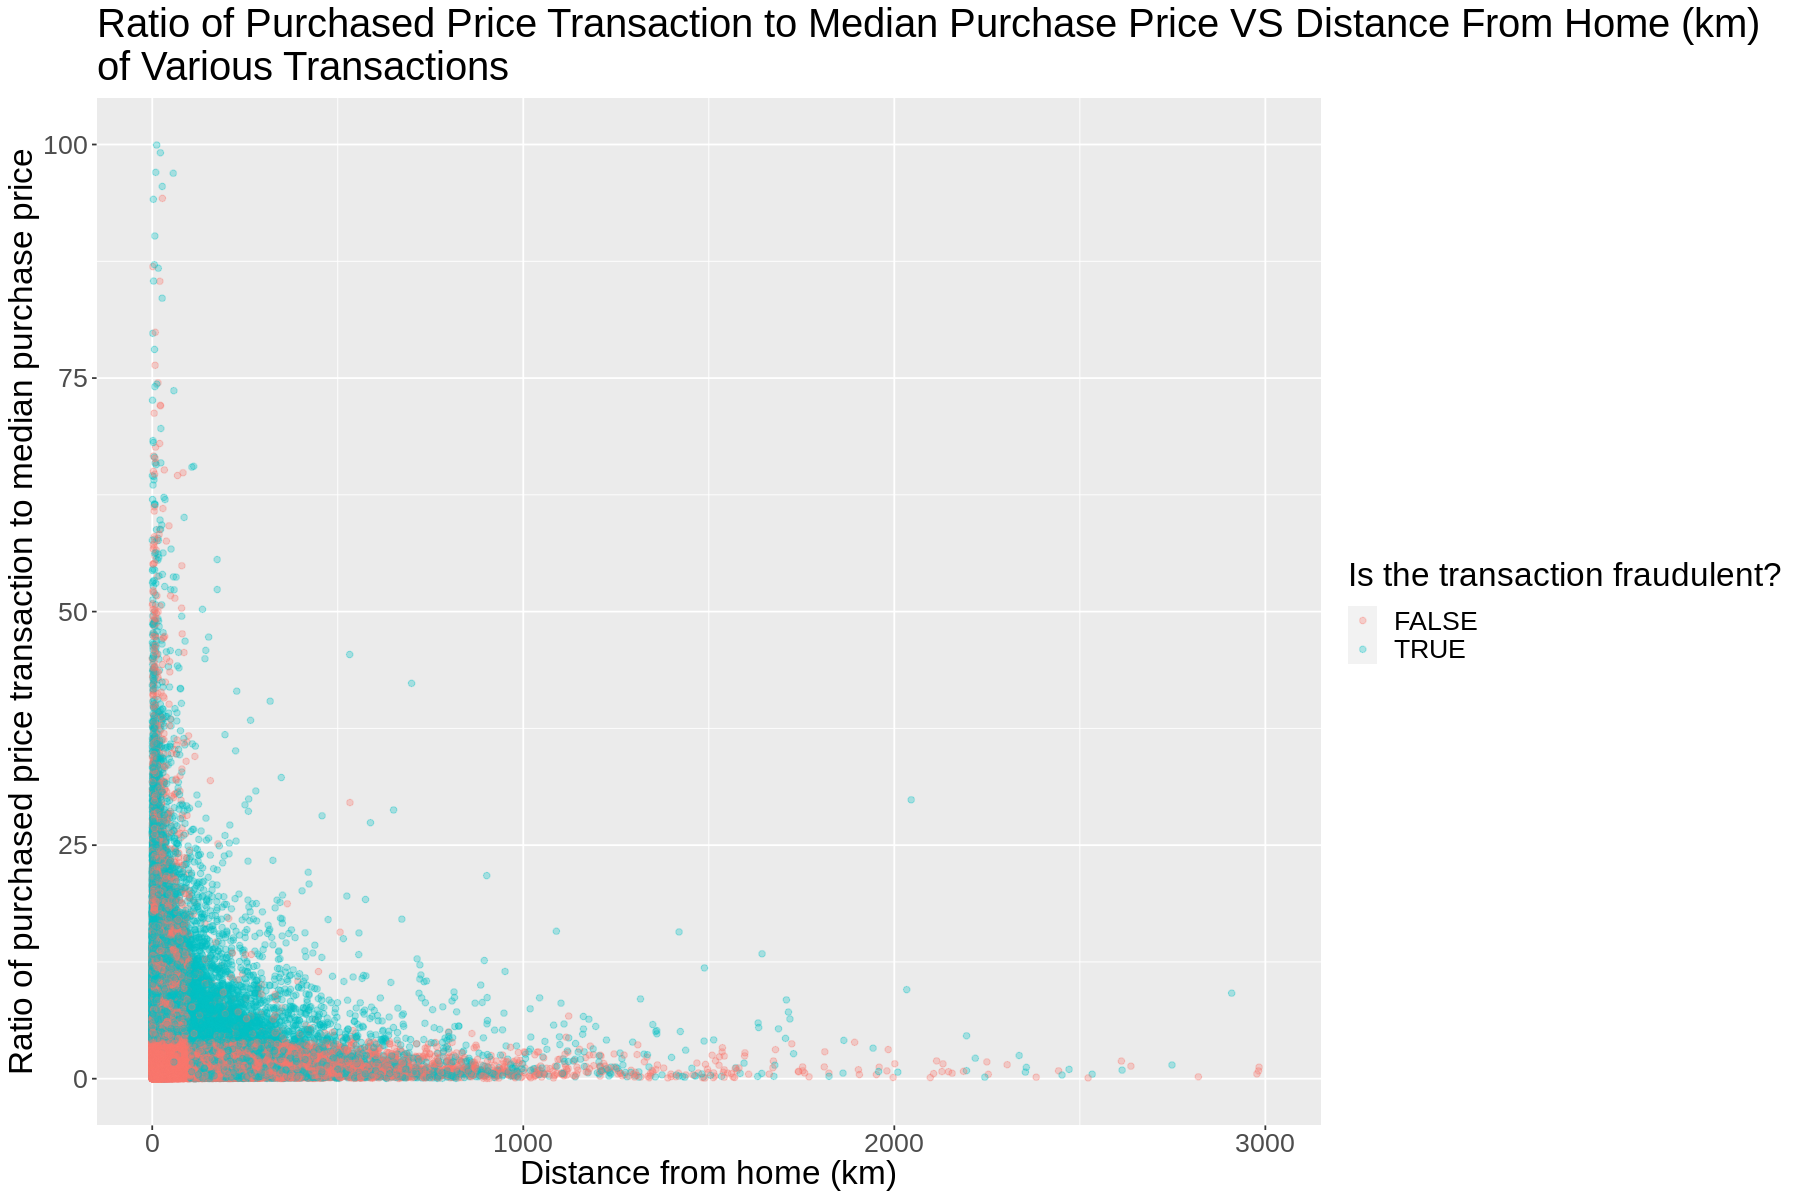

In [31]:
#Setting the size of the plot
options(repr.plot.width = 15, repr.plot.height = 10) 

#Visualizing the relationship by setting up limits to scale the plot
card_plot <- ggplot(card_train, aes(x = distance_from_home , y =  ratio_to_median_purchase_price, color = fraud)) +
             geom_point(alpha = 0.3) +
             scale_y_continuous(limits = c(0, 100)) +
             scale_x_continuous(limits = c(0, 3000)) +
             labs(x = "Distance from home (km)", 
                  y = "Ratio of purchased price transaction to median purchase price", 
                  color = "Is the transaction fraudulent?" ) +
             ggtitle("Ratio of Purchased Price Transaction to Median Purchase Price VS Distance From Home (km) \nof Various Transactions") +
             theme(text = element_text(size = 20))
card_plot

## 4. Methods

To conduct or analysis, we will load the dataset into R, find the correlation between fraud and other variables, and clean and wrangle the dataset into a tidy format. We will use `fraud` as our target variable and our predictors are `ratio_to_median_purchase_price` and `distance_from_home` as they have the highest correlation to fraud. 
We will then determine the value of K that has the highest estimated accuracy by cross validation and set our model specifications based on it. Then, we will create our recipe and workflow. Lastly, we would use our classifier to predict whether a transaction in the original dataset is fraudulent and evaluate its accuracy. The final step is to visualize our analysis by creating a scatterplot of `ratio_to_median_purchase_price` VS `distance_from_home` where fraudulent and non-fraudulent transactions are separated by different colors and the prediction will be represented through coloured areas.


## 5. Expected outcomes and significance

**1) What do you expect to find?**

We expect to find that when the distance is within 100 km of the customer and the ratio of the purchased transaction to median purchase prices is 4 and below, it is unlikely that this transaction is a fraud. When the customer is between 100 and 500 km distance and the ratio is between 4 and 25 the chances of it being a fraudulent transaction is higher.

**2) What impact could such findings have?**

It could dictate and influence consumer decisions when purchasing items from vendors both online and offline and help algorithm and moderators of online and offline shopping platforms to identify potential fraudulent vendors.

**3) What future questions could this lead to?**

This could lead to the rationale behind why it is more likely that a vendor to be fraudulent on higher price items when further away from the customers' home. Whether it is because more customers are more likely to purchase from fraudulent vendor that sell expensive merchandise or because vendors are less likely to be caught when they are further away from their victim's place of residence that causes the phenomenon we observe.
